# Pre-processing and Advanced EDA: Sprint 2

**Table of Contents**<a id='toc0_'></a> 
- [Libraries](#toc0_)
- [Feature Engineering](#toc1_)    
  - [Total Active Energy Consumption by Household](#toc1_1_)    
  - [Total Active EnergyConsumed by HouseHold not measured in sub-meterings 1,2 and 3](#toc1_2_)    
  - [Total Reactive Energy Consumption by HouseHold](#toc1_3_)    
  - [Resampling data to hourly daily and  monthly frequency for better analysis](#toc1_4_)    
- [Advanced EDA: Energy Consumed by Household](#toc2_)      
    - [Trend-Seasonal Decomposition for Target Variable: Energy Consumed by Household](#toc2_1_)     
- [Next Steps](#toc3_)    
  

# Libraries

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from warnings import filterwarnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Loading sklearn functionality 
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, f_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Important functionality for this lesson ---> Statistical tools for model building etc
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
# Standard imports


from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from ipywidgets import interactive
import ipywidgets as widgets



In [28]:
file_path = r'C:\Users\karni\OneDrive\Desktop\GitHub\BrainStation_CapstoneProject\data\power_weather.csv'
power_df_clean = pd.read_csv(file_path, parse_dates=['DateTime'], index_col='DateTime')
power_df_clean.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
DateTime,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,7.120,94.200,6.240,4.100,1012.400,100.0,14.280,31.100,329.400,8.000,0.0,8.000
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,7.108,94.167,6.225,4.092,1012.417,100.0,14.242,31.075,329.417,7.833,0.0,7.833
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,7.097,94.133,6.210,4.083,1012.433,100.0,14.203,31.050,329.433,7.667,0.0,7.667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,7.085,94.100,6.195,4.075,1012.450,100.0,14.165,31.025,329.450,7.500,0.0,7.500
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,7.073,94.067,6.180,4.067,1012.467,100.0,14.127,31.000,329.467,7.333,0.0,7.333


In [29]:
power_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   temperature_2m         float64
 8   relative_humidity_2m   float64
 9   dew_point_2m           float64
 10  apparent_temperature   float64
 11  surface_pressure       float64
 12  cloudcover             float64
 13  windspeed_10m          float64
 14  windgusts_10m          float64
 15  winddirection_10m      float64
 16  shortwave_radiation    float64
 17  direct_radiation       float64
 18  diffuse_radiation      float64
dtypes: float64(19)
memory usage: 312.7 MB


# Feature Engineering

In the preprocessing step, we will focus on **Feature Engineering** Create new features that may be useful for our analysis.
First lets add the approriate units to the columns that we will be using for our analysis.

In [30]:
Units = {
    'Global_active_power': 'kilowatts',
    'Global_reactive_power': 'kilowatts',   
    'Voltage': 'volts',
    'Global_intensity': 'amperes',
    'Sub_metering_1': 'watt-hours of active energy',
    'Sub_metering_2': 'watt-hours of active energy',
    'Sub_metering_3': 'watt-hours of active energy',    
    'temperature_2m': '°C',
    'relative_humidity_2m': '%',
    'dew_point_2m': '°C',
    'apparent_temperature': '°C',
    'surface_pressure':'hPa',
    'cloudcover': '%',
    'windspeed_10m': 'km/h',
    'windgusts_10m': 'km/h',
    'winddirection_10m': 'degrees',
    'shortwave_radiation': 'W/m²',
    'direct_radiation': 'W/m²',
    'diffuse_radiation': 'W/m²'
    
    }

In [31]:
feature_names = []
for i in Units.keys():
    feature_names.append(f"{i} ({Units[i]})")

feature_names

['Global_active_power (kilowatts)',
 'Global_reactive_power (kilowatts)',
 'Voltage (volts)',
 'Global_intensity (amperes)',
 'Sub_metering_1 (watt-hours of active energy)',
 'Sub_metering_2 (watt-hours of active energy)',
 'Sub_metering_3 (watt-hours of active energy)',
 'temperature_2m (°C)',
 'relative_humidity_2m (%)',
 'dew_point_2m (°C)',
 'apparent_temperature (°C)',
 'surface_pressure (hPa)',
 'cloudcover (%)',
 'windspeed_10m (km/h)',
 'windgusts_10m (km/h)',
 'winddirection_10m (degrees)',
 'shortwave_radiation (W/m²)',
 'direct_radiation (W/m²)',
 'diffuse_radiation (W/m²)']

In [32]:
#Adding the feature names to the dataframe
power_df_clean.columns = feature_names

In [33]:
power_df_clean.head()

,Global_active_power (kilowatts),Global_reactive_power (kilowatts),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
DateTime,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,7.120,94.200,6.240,4.100,1012.400,100.0,14.280,31.100,329.400,8.000,0.0,8.000
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,7.108,94.167,6.225,4.092,1012.417,100.0,14.242,31.075,329.417,7.833,0.0,7.833
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,7.097,94.133,6.210,4.083,1012.433,100.0,14.203,31.050,329.433,7.667,0.0,7.667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,7.085,94.100,6.195,4.075,1012.450,100.0,14.165,31.025,329.450,7.500,0.0,7.500
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,7.073,94.067,6.180,4.067,1012.467,100.0,14.127,31.000,329.467,7.333,0.0,7.333


### Total Active Energy Consumption by HouseHold

In [34]:
# lets look at our  target variable
#We need to calculate the active energy consumed by the household every minute, which is expressed usually in kwh from global active power
power_df_clean['Energy Consumed by Household (Watt-hour)'] = power_df_clean['Global_active_power (kilowatts)'] * 1000 / 60 
power_df_clean.head()

,Global_active_power (kilowatts),Global_reactive_power (kilowatts),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),Energy Consumed by Household (Watt-hour)
DateTime,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,7.120,94.200,6.240,4.100,1012.400,100.0,14.280,31.100,329.400,8.000,0.0,8.000,70.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,7.108,94.167,6.225,4.092,1012.417,100.0,14.242,31.075,329.417,7.833,0.0,7.833,89.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,7.097,94.133,6.210,4.083,1012.433,100.0,14.203,31.050,329.433,7.667,0.0,7.667,89.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,7.085,94.100,6.195,4.075,1012.450,100.0,14.165,31.025,329.450,7.500,0.0,7.500,89.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,7.073,94.067,6.180,4.067,1012.467,100.0,14.127,31.000,329.467,7.333,0.0,7.333,61.100000


### Total Active Energy Consumed by HouseHold not measured in sub-meterings 1, 2 and 3.

In [35]:
#We need to calculate the active energy consumed by the household excluding the submet, which is the difference between the total active power and the sub-metered values.
# The formula is: Active Energy Consumed = Global_active_power * 1000 /60 - Sub_metering_1 - Sub_metering_2 - Sub_metering_3
power_df_clean['Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)'] = power_df_clean['Global_active_power (kilowatts)'] * 1000 / 60 -power_df_clean['Sub_metering_1 (watt-hours of active energy)'] - power_df_clean['Sub_metering_2 (watt-hours of active energy)'] - power_df_clean['Sub_metering_3 (watt-hours of active energy)']
power_df_clean.head()

,Global_active_power (kilowatts),Global_reactive_power (kilowatts),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),...,surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),Energy Consumed by Household (Watt-hour),"Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)"
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,7.120,94.200,6.240,...,1012.400,100.0,14.280,31.100,329.400,8.000,0.0,8.000,70.266667,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,7.108,94.167,6.225,...,1012.417,100.0,14.242,31.075,329.417,7.833,0.0,7.833,89.333333,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,7.097,94.133,6.210,...,1012.433,100.0,14.203,31.050,329.433,7.667,0.0,7.667,89.566667,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,7.085,94.100,6.195,...,1012.450,100.0,14.165,31.025,329.450,7.500,0.0,7.500,89.800000,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,7.073,94.067,6.180,...,1012.467,100.0,14.127,31.000,329.467,7.333,0.0,7.333,61.100000,43.100000


### Total Reactive Energy Consumption by HouseHold

In [36]:
#lets also for consistency create a column for the total  reactive energy consumed by the household from reactive power
power_df_clean['Reactive Energy Consumed by Household (Watt-hour)'] = power_df_clean['Global_reactive_power (kilowatts)'] * 1000 / 60

In [37]:
power_df_clean.head()

,Global_active_power (kilowatts),Global_reactive_power (kilowatts),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),...,cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),Energy Consumed by Household (Watt-hour),"Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)",Reactive Energy Consumed by Household (Watt-hour)
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,7.120,94.200,6.240,...,100.0,14.280,31.100,329.400,8.000,0.0,8.000,70.266667,52.266667,6.966667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,7.108,94.167,6.225,...,100.0,14.242,31.075,329.417,7.833,0.0,7.833,89.333333,72.333333,7.266667
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,7.097,94.133,6.210,...,100.0,14.203,31.050,329.433,7.667,0.0,7.667,89.566667,70.566667,8.300000
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,7.085,94.100,6.195,...,100.0,14.165,31.025,329.450,7.500,0.0,7.500,89.800000,71.800000,8.366667
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,7.073,94.067,6.180,...,100.0,14.127,31.000,329.467,7.333,0.0,7.333,61.100000,43.100000,8.800000


In [38]:
# Move the last three columns to the front
cols = list(power_df_clean.columns)
new_order = cols[-3:] + cols[:-3]
power_df_clean = power_df_clean[new_order]
power_df_clean.head()

,Energy Consumed by Household (Watt-hour),"Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)",Reactive Energy Consumed by Household (Watt-hour),Global_active_power (kilowatts),Global_reactive_power (kilowatts),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),...,dew_point_2m (°C),apparent_temperature (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,70.266667,52.266667,6.966667,4.216,0.418,234.84,18.4,0.0,1.0,17.0,...,6.240,4.100,1012.400,100.0,14.280,31.100,329.400,8.000,0.0,8.000
2006-12-16 17:25:00,89.333333,72.333333,7.266667,5.360,0.436,233.63,23.0,0.0,1.0,16.0,...,6.225,4.092,1012.417,100.0,14.242,31.075,329.417,7.833,0.0,7.833
2006-12-16 17:26:00,89.566667,70.566667,8.300000,5.374,0.498,233.29,23.0,0.0,2.0,17.0,...,6.210,4.083,1012.433,100.0,14.203,31.050,329.433,7.667,0.0,7.667
2006-12-16 17:27:00,89.800000,71.800000,8.366667,5.388,0.502,233.74,23.0,0.0,1.0,17.0,...,6.195,4.075,1012.450,100.0,14.165,31.025,329.450,7.500,0.0,7.500
2006-12-16 17:28:00,61.100000,43.100000,8.800000,3.666,0.528,235.68,15.8,0.0,1.0,17.0,...,6.180,4.067,1012.467,100.0,14.127,31.000,329.467,7.333,0.0,7.333


In [39]:
#lets drop the glbobal active power column as it is not needed anymore
power_df_clean.drop(columns=['Global_active_power (kilowatts)'], inplace=True)
#lets also drop the global reactive power column as it is not needed anymore
power_df_clean.drop(columns=['Global_reactive_power (kilowatts)'], inplace=True)

In [40]:
power_df_clean

,Energy Consumed by Household (Watt-hour),"Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)",Reactive Energy Consumed by Household (Watt-hour),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
DateTime,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,70.266667,52.266667,6.966667,234.84,18.4,0.0,1.0,17.0,7.120,94.200,6.240,4.100,1012.400,100.0,14.280,31.100,329.400,8.000,0.0,8.000
2006-12-16 17:25:00,89.333333,72.333333,7.266667,233.63,23.0,0.0,1.0,16.0,7.108,94.167,6.225,4.092,1012.417,100.0,14.242,31.075,329.417,7.833,0.0,7.833
2006-12-16 17:26:00,89.566667,70.566667,8.300000,233.29,23.0,0.0,2.0,17.0,7.097,94.133,6.210,4.083,1012.433,100.0,14.203,31.050,329.433,7.667,0.0,7.667
2006-12-16 17:27:00,89.800000,71.800000,8.366667,233.74,23.0,0.0,1.0,17.0,7.085,94.100,6.195,4.075,1012.450,100.0,14.165,31.025,329.450,7.500,0.0,7.500
2006-12-16 17:28:00,61.100000,43.100000,8.800000,235.68,15.8,0.0,1.0,17.0,7.073,94.067,6.180,4.067,1012.467,100.0,14.127,31.000,329.467,7.333,0.0,7.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,15.766667,15.766667,0.000000,240.43,4.0,0.0,0.0,0.0,-1.163,90.600,-2.523,-4.763,994.707,37.4,7.480,12.950,215.267,0.000,0.0,0.000
2010-11-26 20:59:00,15.733333,15.733333,0.000000,240.00,4.0,0.0,0.0,0.0,-1.182,90.800,-2.512,-4.782,994.703,37.7,7.490,12.975,215.133,0.000,0.0,0.000
2010-11-26 21:00:00,15.633333,15.633333,0.000000,239.82,3.8,0.0,0.0,0.0,-1.200,91.000,-2.500,-4.800,994.700,38.0,7.500,13.000,215.000,0.000,0.0,0.000


We will save the new dataframe into a csv file, but before that we would resample the data to daily and monthly frequency for better analysis

### Resampling data to hourly daily and  monthly frequency for better analysis

In [41]:

# Resampling the data to daily frequency
power_df_daily = power_df_clean.resample('D').mean()
# Saving the daily data to a csv file
power_df_daily.to_csv(r"C:\Users\karni\OneDrive\Desktop\GitHub\BrainStation_CapstoneProject\data\power_weather_daily.csv", index=True)

In [42]:
power_df_daily.head()

,Energy Consumed by Household (Watt-hour),"Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)",Reactive Energy Consumed by Household (Watt-hour),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
DateTime,,,,,,,,,,,,,,,,,,,,
2006-12-16,50.891246,37.073064,1.469781,236.243763,13.082828,0.000000,1.378788,12.439394,5.625303,92.825000,4.569798,2.931313,1015.163889,71.457071,9.481768,21.008965,321.304040,0.616162,0.000000,0.616162
2006-12-17,39.241435,25.657407,2.615810,240.087028,9.999028,1.411806,2.907639,9.264583,3.027049,94.708333,2.206215,0.097951,1017.579097,72.889931,7.903472,15.710764,242.601389,40.250000,16.666667,23.583333
2006-12-18,25.507245,13.214190,1.872593,241.231694,6.421667,0.738194,1.820139,9.734722,3.175417,95.688542,2.548437,0.494479,1016.970139,87.028472,6.625590,13.020660,147.589236,26.791667,6.166667,20.625000
2006-12-19,19.284653,9.119375,1.747014,241.999313,4.926389,0.582639,5.279167,4.303472,1.833819,88.668750,0.102882,-2.676146,1021.646493,34.131597,16.303924,29.688542,31.273264,49.583333,30.333333,19.250000
2006-12-20,25.760972,14.156111,1.863403,242.308062,6.467361,0.000000,1.838889,9.765972,1.220972,86.185069,-0.910590,-3.250208,1025.086319,7.914583,14.989792,27.639271,33.690625,54.875000,38.583333,16.291667


In [43]:
power_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Energy Consumed by Household (Watt-hour)                                     1433 non-null   float64
 1   Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)  1433 non-null   float64
 2   Reactive Energy Consumed by Household (Watt-hour)                            1433 non-null   float64
 3   Voltage (volts)                                                              1433 non-null   float64
 4   Global_intensity (amperes)                                                   1433 non-null   float64
 5   Sub_metering_1 (watt-hours of active energy)                                 1433 non-null   float64
 6   Sub_metering_2

In [44]:
#lets look at monthly power usage
# the "M" option specifies 	monthly frequency 
power_df_monthly = power_df_clean.resample("MS").mean()
power_df_monthly.to_csv(r"C:\Users\karni\OneDrive\Desktop\GitHub\BrainStation_CapstoneProject\data\power_weather_monthly.csv", index=True)


In [45]:
power_df_monthly.head()

,Energy Consumed by Household (Watt-hour),"Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)",Reactive Energy Consumed by Household (Watt-hour),Voltage (volts),Global_intensity (amperes),Sub_metering_1 (watt-hours of active energy),Sub_metering_2 (watt-hours of active energy),Sub_metering_3 (watt-hours of active energy),temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),surface_pressure (hPa),cloudcover (%),windspeed_10m (km/h),windgusts_10m (km/h),winddirection_10m (degrees),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
DateTime,,,,,,,,,,,,,,,,,,,,
2006-12-01,31.688252,20.815071,2.189763,241.441125,8.029956,1.248636,2.214987,7.409558,2.665667,89.373203,1.035962,-1.077252,1020.453060,69.210094,12.331461,23.786715,122.629084,34.024386,14.111747,19.912639
2007-01-01,25.767232,15.343714,2.211268,240.905101,6.546915,1.264237,1.775931,7.383351,7.207161,84.024638,4.577192,3.423857,1010.176016,82.074769,17.715948,35.031811,211.768246,38.132655,15.181784,22.950871
2007-02-01,23.351392,13.865257,1.893946,240.519390,5.914569,1.180217,1.602361,6.703557,7.549305,82.832249,4.651629,3.992242,999.810829,79.073664,15.637397,31.425021,194.193422,73.579543,38.948361,34.631182
2007-03-01,21.977117,11.764254,1.912447,240.513469,5.572979,1.361343,2.346872,6.504648,7.257748,79.442310,3.707103,3.849526,1005.630479,59.874198,13.452050,27.374541,215.718411,124.956769,71.833233,53.123536
2007-04-01,14.853149,8.013774,1.979631,239.400026,3.825676,1.065886,0.973149,4.800339,13.788870,68.136852,7.520775,11.847011,1008.825148,30.560534,10.867634,22.397924,100.470444,248.593624,193.129412,55.464212


In [46]:
power_df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2006-12-01 to 2010-11-01
Freq: MS
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Energy Consumed by Household (Watt-hour)                                     48 non-null     float64
 1   Energy Consumed by Household excluding sub-meterings 1, 2 and 3 (Watt-hour)  48 non-null     float64
 2   Reactive Energy Consumed by Household (Watt-hour)                            48 non-null     float64
 3   Voltage (volts)                                                              48 non-null     float64
 4   Global_intensity (amperes)                                                   48 non-null     float64
 5   Sub_metering_1 (watt-hours of active energy)                                 48 non-null     float64
 6   Sub_metering_2 

# <a id='toc4_1_'></a>Advanced EDA: Energy Consumed by Household   [&#8593;](#toc0_)

We will take a look at the `Energy Consumed by Household` column - this is the variable of interest (dependent variable) that we would like to predict.For now lets look at the monthly data



In [65]:
fig = px.line(power_df_daily, x=power_df_daily.index, y='Energy Consumed by Household (Watt-hour)',)
fig.update_layout(
    yaxis_title="Total Energy Consumed (Watt-hour)", 
    xaxis_title="Period",
    legend_title="Energy Consumed by Household (Watt-hour) per Month over Time", 
    title="Energy Consumed by Household (Watt-hour) over Time From 2007 to 2010 "
)
fig.show()

In [49]:
fig = px.line(power_df_monthly, x=power_df_monthly.index, y='Energy Consumed by Household (Watt-hour)',)
fig.update_layout(
    yaxis_title="Total Energy Consumed (Watt-hour)", 
    xaxis_title="Month-Year",
    legend_title="Energy Consumed by Household (Watt-hour) per Month over Time", 
    title="Energy Consumed by Household (Watt-hour) per Month over Time From 2007 to 2010 "
)
fig.show()

In [50]:
pd.options.display.float_format = '{:.2f}'.format #Changing format to display numeric values instead of scientific notation

# Displaying the descriptive statistics of the "Global_active_power" column
power_df_clean.describe()['Energy Consumed by Household (Watt-hour)'].round(2) # rounding to 2 decimal places


count   2049280.00
mean         18.19
std          17.62
min           1.27
25%           5.13
50%          10.03
75%          25.47
max         185.37
Name: Energy Consumed by Household (Watt-hour), dtype: float64


We can see that the average energy consumption is around 18.2 Watt-hour with a maximum of 185 Watt-hour  and a minimum of 1.27 Watt-hour .


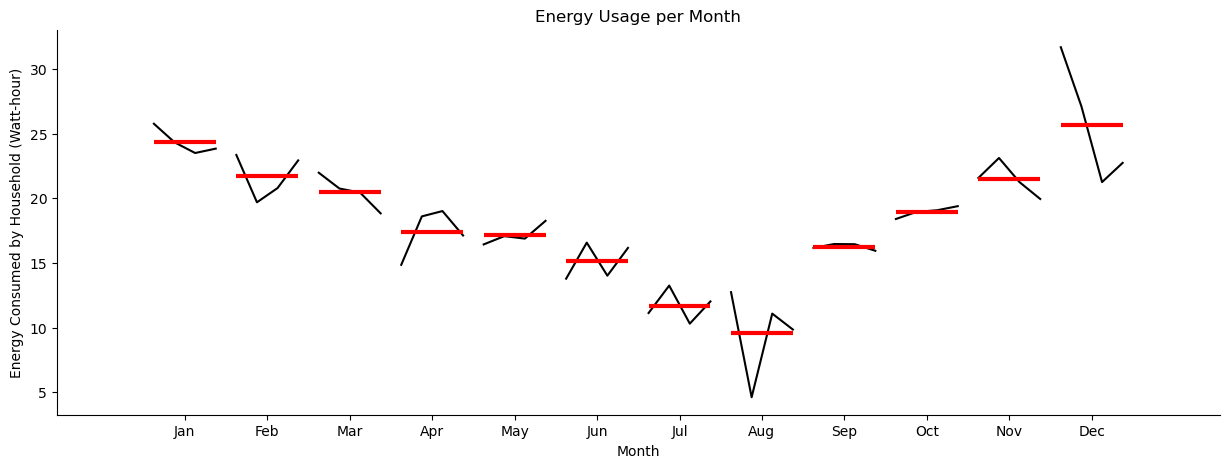

In [53]:
# Lets explore some seasonal patterns in the data.
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(15, 5))

# create the seasonal plot
month_plot(power_df_monthly['Energy Consumed by Household (Watt-hour)'], ax=plt.gca())
plt.xlabel("Month")
plt.ylabel("Energy Consumed by Household (Watt-hour)")
plt.title("Energy Usage per Month")
sns.despine()
plt.show()

The red bars show the average for the given month across all years, while each black line represent an individual month and the progression of values across the years. 

Through the year, we can see that energy consumption is highest in the winter months (December, January, February) and lowest in the summer months (June, July, August).The  usage shows a clear seasonal pattern, with peaks in the winter months and troughs in the summer months. A U shaped is observed in the data, with the lowest values in the summer months and the highest values in the winter months.

Next we can look at the energy consumption for each month and see how much it differs from the overall average.

In [55]:
# monthly average
monthly_mean = power_df_monthly.groupby(power_df_monthly.index.month_name()).mean()

# relative deviation from the overall mean
monthly_mean_diff = (monthly_mean - monthly_mean.mean())/monthly_mean

# month names in right order
month_names = pd.date_range(start='2006-01' ,freq='M', periods=12).month_name()

# reorder columns to follow the month order
monthly_mean_diff = monthly_mean_diff.loc[month_names, ]

monthly_mean_diff['Energy Consumed by Household (Watt-hour)'].T

January      0.25
February     0.16
March        0.11
April       -0.05
May         -0.07
June        -0.21
July        -0.57
August      -0.92
September   -0.13
October      0.03
November     0.15
December     0.29
Name: Energy Consumed by Household (Watt-hour), dtype: float64

 Lets visualize this data

In [56]:
fig = px.bar(monthly_mean_diff['Energy Consumed by Household (Watt-hour)'].T)

fig.update_layout(
    yaxis_title="", 
    yaxis_tickformat = '.1%',
    xaxis_title="",
    title="Monthly deviation from mean Energy Conumed (%)",
    showlegend=False,
)
fig.show()

We can see that the positive highest deviation from the mean occurs in December at 28%,  and the highest negative deviation occurs in August at 91%, which is summer. This suggests that households use more energy during the winter months, likely for heating purposes, and less during the summer months.

### Trend-Seasonal Decomposition for Target Variable: Energy Consumed by Household

A fundamental step in time series EDA is the trend-seasonal decomposition. Here, we extract three series from our original Global Active Power variable: 
- a trend component $T_t$ calculated using a moving average,
- a seasonal component $S_t$ which is the monthly average of the de-trended series, and
- the residual $R_t$ that remains after subtracting the trend and seasonal component from the original series.

Adding up these three components will give back the original series:

$$y_t = T_t + S_t + R_t$$




In [58]:
Energy_df=power_df_monthly[['Energy Consumed by Household (Watt-hour)']]
Energy_df.head()

,Energy Consumed by Household (Watt-hour)
DateTime,
2006-12-01,31.69
2007-01-01,25.77
2007-02-01,23.35
2007-03-01,21.98
2007-04-01,14.85


In [59]:
# decompose the time series
decomposition = tsa.seasonal_decompose(Energy_df, model='additive')

In [60]:
type(decomposition)

statsmodels.tsa.seasonal.DecomposeResult

In [61]:
# visulalize the decomposition
Energy_df["Trend"] = decomposition.trend
Energy_df["Seasonal"] = decomposition.seasonal
Energy_df["Residual"] = decomposition.resid

Energy_df.head(10)

,Energy Consumed by Household (Watt-hour),Trend,Seasonal,Residual
DateTime,,,,
2006-12-01,31.69,NaN,5.57,NaN
2007-01-01,25.77,NaN,5.72,NaN
2007-02-01,23.35,NaN,2.99,NaN
2007-03-01,21.98,NaN,1.91,NaN
2007-04-01,14.85,NaN,0.13,NaN
2007-05-01,16.43,NaN,-0.71,NaN
2007-06-01,13.78,18.80,-3.47,-1.54
2007-07-01,11.12,18.54,-6.55,-0.87
2007-08-01,12.74,18.33,-8.60,3.01


In [62]:
Energy_df.tail(10)

,Energy Consumed by Household (Watt-hour),Trend,Seasonal,Residual
DateTime,,,,
2010-02-01,22.93,18.26,2.99,1.68
2010-03-01,18.83,18.19,1.91,-1.26
2010-04-01,17.12,18.18,0.13,-1.19
2010-05-01,18.25,18.14,-0.71,0.82
2010-06-01,16.16,NaN,-3.47,NaN
2010-07-01,12.02,NaN,-6.55,NaN
2010-08-01,9.85,NaN,-8.60,NaN
2010-09-01,15.94,NaN,-1.67,NaN
2010-10-01,19.39,NaN,0.79,NaN


The null values are due the fact that the trend component is calculated with a rolling average that is not defined at the beginning and end of the series.

In [63]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=Energy_df.index, y=Energy_df[col]),
        row=i+1,
        col=1
    )

fig.update_layout(showlegend=False)
fig.show()

From the decomposition, we can see that the trend is generally decreasing over time, indicating a long-term decrease in energy consumption by the household. The seasonal component shows a clear pattern of higher usage in winter months and lower usage in summer months, which is consistent with the expectation that households use more energy for heating in winter. The residuals show some random fluctuations around zero, indicating that there are no significant outliers or patterns left after accounting for trend and seasonality.

**I will continue with baseline modelling for the target variable: Energy Consumed by Household (Watt-hour)** in the next notebook.